In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('points.csv')
print(df.shape)
df.sample(5)

(6931, 129)


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,clean
4510,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,28,3,0,0,0
4382,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,121,3,0,0,0
4781,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,185,1,0,0,0
413,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,164,2,0,0,1
4173,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,57,2,0,0,0


In [3]:
df = df[df.clean == 0]
print(df.shape)
df.sample(5)

(3424, 129)


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,clean
3858,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,98,3,0,0,0
6134,91,219,99,193,133,10,70,63,230,204,...,0,32,0,0,0,153,0,0,0,0
5313,82,146,76,193,20,201,49,63,5,172,...,0,104,0,0,0,25,1,0,0,0
3852,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,182,3,0,0,0
4212,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,195,2,0,0,0


In [4]:
df_std = StandardScaler().fit_transform(df)

scaled_df = pd.DataFrame(df_std, index=df.index, columns=df.columns)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,clean
3507,0.186794,1.238545,3.199883,1.657941,-0.286771,1.344705,2.243684,1.663881,2.355793,2.759985,...,0.0,1.340194,0.0,0.0,0.0,-0.798122,-0.732258,0.0,0.0,0.0
3508,1.234792,0.180612,3.199883,1.657941,1.545768,0.403264,2.243684,1.663881,3.108905,1.565647,...,0.0,1.255109,0.0,0.0,0.0,-0.901320,-0.732258,0.0,0.0,0.0
3509,2.890326,-0.177000,3.199883,1.657941,-0.439483,0.099573,2.243684,1.663881,2.124067,1.172389,...,0.0,1.297651,0.0,0.0,0.0,-1.210914,-0.732258,0.0,0.0,0.0
3510,0.748764,1.119342,3.199883,1.657941,0.339346,1.238413,2.243684,1.663881,2.022686,2.628899,...,0.0,1.127481,0.0,0.0,0.0,-1.172214,-0.732258,0.0,0.0,0.0
3511,0.642445,3.294811,3.182738,1.657941,1.484684,-0.219302,2.243684,1.663881,1.124745,0.779131,...,0.0,1.382737,0.0,0.0,0.0,-0.965819,-0.732258,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,-0.481495,-0.489910,-0.434985,-0.593972,-0.485297,-0.492624,-0.454639,-0.593965,-0.497343,-0.502598,...,0.0,-0.531684,0.0,0.0,0.0,0.775646,0.289026,0.0,0.0,0.0
6927,-0.481495,-0.489910,-0.434985,-0.593972,-0.485297,-0.492624,-0.454639,-0.593965,-0.497343,-0.502598,...,0.0,-0.531684,0.0,0.0,0.0,-0.475629,0.289026,0.0,0.0,0.0
6928,-0.481495,-0.489910,-0.434985,-0.593972,-0.485297,-0.492624,-0.454639,-0.593965,-0.497343,-0.502598,...,0.0,-0.531684,0.0,0.0,0.0,0.208057,0.289026,0.0,0.0,0.0
6929,-0.481495,-0.489910,-0.434985,-0.593972,-0.485297,-0.492624,-0.454639,-0.593965,-0.497343,-0.502598,...,0.0,-0.531684,0.0,0.0,0.0,-0.772323,0.289026,0.0,0.0,0.0


In [5]:
%%time

pca = PCA(n_components=25)

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents)

evr = pca.explained_variance_ratio_
evr.sum()

CPU times: user 53.8 ms, sys: 8.35 ms, total: 62.2 ms
Wall time: 33.9 ms


0.9310418555982197

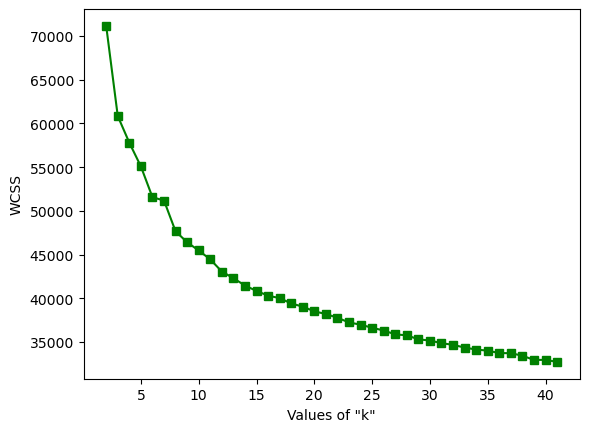

In [6]:
limit = int((principalComponents.shape[0]//2)**0.5)
 
# selecting optimal value of 'k'
# using elbow method
 
# wcss - within cluster sum of
# squared distances
wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(principalComponents)
    wcss[k] = model.inertia_
     
# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [7]:
%%time

n_init = 12
max_iter = 225
tol = 0.0001
random_state = 123
n_clusters = 6

clusterer = KMeans(n_clusters=n_clusters, max_iter = max_iter, random_state = random_state)

cluster_labels = clusterer.fit_predict(principalComponents)

# inertia
inertia = clusterer.inertia_

CPU times: user 462 ms, sys: 13.5 ms, total: 476 ms
Wall time: 42.1 ms


In [8]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 6 , the inertia is : 51566.35788542137


In [9]:
import pickle

with open('models/clustering_KMeans.pkl','wb') as f:
    pickle.dump(clusterer, f)